# Assignment 1

In assignment 1 we will analyze the motor that powers the transport chain. We will first determine the required speed, torque and power of the motor in order to determine the appropiate motor size. In the next step, we will estimate a function value $K_A$ and discuss the efficiency of the system. For this step, we will model the belt transmission and gear box as a single belt transmission since the detailed efficiency calculation (including the gearbox) will be determined in later assignments. Finally, we will analyze the junction key, and with the help of graphs, choose the correct conditions for the key.

General specifications:
- Life expectancy: 10 years of 20hrs/day 250 days/year
- Motor: Asynchronous with fixed speed of 1500rpm
- Ratio pulley to gear: 3 to 5 **(???)** 
- Maximum deviation of cart speed: 5%
- Pulley shaft connection: Taper-lock bushing

In [1]:
# Install necessary packages if not already installed in your environment
#!pip install sympy, numpy, matplotlib

In [2]:
# Import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Calculation of $P$, $T$ and $n$

**Team-specific data:**
- Cart speed: $v = 15.5 \,\text{km/h}$
- Sprocket diameter: $D = 500 \,\text{mm}$
- Required power at the sprocket: $P_\text{out} = 6 \,\text{kW}$
- Motor speed: $n_\text{in} = 1500 \,\text{rpm}$

---

#### Output shaft speed and torque
From the cart speed $v$ and the sprocket diameter $D$, we determine the angular speed $n_\text{out}$ of the output shaft.  
With $n_\text{out}$ and the required output power $P_\text{out}$, the torque on the output shaft $T_\text{out}$ follows from:
$$
T_\text{out} = \frac{P_\text{out}}{\omega_\text{out}}
$$
---

#### Input shaft power and torque
For the input shaft, we assume an overall efficiency $\eta_\text{tot}$ (here initially $90\%$ as a reasonable estimate).  
The motor input power is:
$$
P_\text{in} = \frac{P_\text{out}}{\eta_\text{tot}}
$$
With the given motor speed $n_\text{in}$, the input torque is:
$$
T_\text{in} = \frac{P_\text{in}}{\omega_\text{in}}
$$
---


In [3]:
# Given data
speed_output = 15.5 * 1000 / 3600  # m/s
diameter_sprocket = 500 * (1/1000) # m
power_output = 6 * 1000   # W
n_motor = 1500  # rpm

# Angular speed of output shaft
angular_speed_output = speed_output / (diameter_sprocket / 2)  # rad/s
n_output = angular_speed_output * 60 / (2 * np.pi)  # rpm
print("Angular speed of output shaft:", round(n_output, 2), "rpm")

# Torque on output shaft
torque_output = power_output / angular_speed_output  # Nm
print("Torque on output shaft:", round(torque_output, 2), "Nm")

# Assuming an *optimistic* efficiency of 90% (since we are not analyzing the gerabox and pulley system in detail)
efficiency = 0.9
power_input = power_output / efficiency  # W
print("Power input to the motor:", round(power_input, 2), "W")

# Torque on motor shaft
angular_speed_motor = n_motor * (2 * np.pi) / 60  # rad/s
torque_motor = power_input / angular_speed_motor  # Nm
print("Torque on motor shaft:", round(torque_motor, 2), "Nm")


Angular speed of output shaft: 164.46 rpm
Torque on output shaft: 348.39 Nm
Power input to the motor: 6666.67 W
Torque on motor shaft: 42.44 Nm


### Motor selection

Our motor will have a rotational speed of 1,500rpm and its required power is 6.7kW, so based on Table 16-21 we choose a motor of size 132M since its power (7kW) at the given speed meets our requirements. 

### Estimation and Discussion on the Application Factor \($K_A$\) and Efficiency

The application factor \($K_A$\) accounts for the type of drive, startup conditions, load characteristics, transmission sensitivity, and daily operating hours. Based on our system, the following conditions were selected:
- **Drive**: Electromotor  
- **Startup**: Light  
- **Load**: Full load with mild shocks  
- **Sensitivity**: Belt transmission (friction wheel)  
- **Daily use**: 20 h/day  

From the Richter–Ohlendorf diagram, these choices correspond to:

\[
$K_A$ = 1.7
\]

---

#### Justification of Choices
- **Startup (Light):**  
  The motor is started only a few times per week. This is considered rare for an asynchronous motor and significantly less frequent than the "medium" category (several starts per day). Additionally, the use of a soft starter reduces mechanical stresses during startup. For these reasons, the "light" category is appropriate.
- **Load (Full load with mild shocks):**  
  The motor operates close to its rated capacity. While the load is relatively steady, shocks are expected due to the working environment, e.g., coal being thrown into the carts. These shocks are not extreme but still justify the "mild shocks" category.
- **Sensitivity (Belt drive):**  
  The power is transmitted by a belt, which is more sensitive to overloads than direct gear drives. For simplicity in this stage, the system is modeled as a single belt transmission. In a detailed design, the gearbox and the belt transmission would each require their own \($K_A$\) estimation.
- **Daily use (20 h/day):**  
  The motor is specified to run about 250 days per year. Averaged over the full year this corresponds to fewer hours per day, but within operating days the motor runs continuously for up to 20 hours. Changing this assumption from 20 h/day to 14 h/day would only alter \($K_A$\) by less than 0.1, so the conservative choice of 20 h/day is maintained.

---

#### Efficiency Considerations

The application factor \($K_A$\) is also used when estimating the **calculation power** and therefore affects efficiency predictions. However, a precise efficiency calculation requires further design decisions, such as:
- the belt ratio and pulley diameters,
- the gearbox ratio and gear diameters,
- the type of belt or chain used.

Since these design elements are not yet finalized, a detailed efficiency analysis is outside the current scope. At this stage, it is sufficient to note that \($K_A$ = 1.7\) is a conservative and justifiable choice that ensures the system is designed for realistic loading conditions and operating time.
 315

### Selection of junction key (graphs, figures and discussion)

### Key Design Calculation (Motor Shaft)

From the assignment, the motor shaft torque is
$$
T_{\mathrm{motor}} = 42.44\,\text{N}\cdot\text{m}
$$
Using the Richter–Ohlendorf chart, the application factor is:
$$
$K_A$ = 1.7
$$
The motor is a **frame size 132M**, which corresponds to a **shaft diameter**:
$$
d = 38 \ \text{mm}
$$
According to **DIN 6885**, the recommended key size for this shaft diameter is:
$$
b \times h = 10 \times 8 \ \text{mm}
$$
---

#### Design Equation

The average surface pressure on the key is calculated as
$$
p_\text{calc} \;=\; \frac{2\,T_\text{eq}}{d\,h'\,l'} \, .
$$
Since \(K_\lambda = 1\) for **Method C (global)**, no additional load-distribution factor is applied.

With
- **Equivalent torque**
$$
T_\text{eq} \;=\; $K_A$ \, T_\text{nom} \, ,
$$
- \(d\) = shaft diameter,  
- \(h'\approx 0.45\,h\) = effective key height,  
- \(l' \le 1.3\,d\) = effective bearing length.

---

#### Variables
- \(d\): shaft diameter  
- \(b\): key width  
- \(h\): key height  
- \(h'\): effective key height  
- \(l'\): effective bearing length of the key  

---

#### Design Goal
- Increasing the key length $l'$ reduces the calculated pressure $p_\text{calc}$.  
- To ensure safe design:
$$
p_\text{calc} \leq p_\text{perm}
$$
where:
- $p_\text{perm}$ = permissible surface pressure (depends on material strength and safety factor).

---

We will plot $p_\text{calc}(l')$ as a function of key length and compare it to $p_\text{perm}$.  
The intersection point determines the **minimum required key length**.


C:\Users\memor\AppData\Local\Temp\ipykernel_35720\1579340079.py:35: RuntimeWarning: divide by zero encountered in divide
  p_calc = (2 * T_eq) / (d * h_eff * l_eff)  # Pa


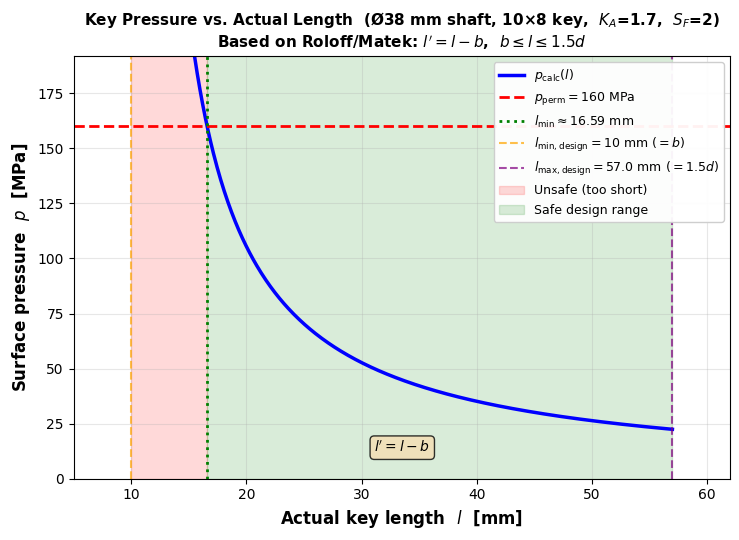

KEY DESIGN ANALYSIS (Based on Roloff/Matek)
Design torque:        T_eq = 72.15 N·m  (T_nom × K_A)
Permissible pressure: p_perm = 160 MPa  (Re/2.0)

Key geometry (DIN 6885):
  Width × Height:     b × h = 10 × 8 mm
  Effective height:   h' = 3.60 mm  (0.45h)

Length limits (Roloff/Matek):
  Minimum design:     l_min = 10 mm  (= b)
  Maximum design:     l_max = 57.0 mm  (= 1.5d)
  Required minimum:   l_req = 16.59 mm  (for p ≤ p_perm)
  Effective length:   l' = l - b  (accounts for rounded ends)

Required effective length: l'_min = 6.59 mm
                           l_min = 16.59 mm  (actual)
✓ Design is SAFE if: 16.59 mm ≤ l ≤ 57.0 mm


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Loads and factors
T_nom = 42.44      # N·m
K_A   = 1.7
T_eq  = T_nom * K_A

# Geometry (DIN 6885 key 10x8 on Ø38 mm)
d     = 38e-3      # m (shaft diameter)
b     = 10e-3      # m (key width)
h     = 8e-3       # m (key height)
h_eff = 0.45 * h   # m (effective height for pressure calculation)

# Material + safety (from Roloff/Matek table)
Re    = 320e6      # Pa
S_F   = 2.0        # Safety factor
p_perm = Re / S_F  # Pa (permissible surface pressure)

# Design limits based on Roloff/Matek:
# - Minimum actual length: l_min ≥ b (key width)
# - Maximum actual length: l_max ≤ 1.5*d (shaft diameter)
# - Effective length: l' = l - b
l_min = b          # m (minimum: equal to key width)
l_max = 1.5 * d    # m (maximum: 1.5 times shaft diameter)

# Actual length sweep (nominal key length)
l = np.linspace(l_min, l_max, 600)  # m

# Effective length (Roloff/Matek: l' = l - b for parallel keys)
l_eff = l - b  # m

# Pressure curve as function of actual length
# p = 2*T / (d * h' * l')  where l' = l - b
p_calc = (2 * T_eq) / (d * h_eff * l_eff)  # Pa

# Required minimum effective length
l_eff_req = (2 * T_eq) / (d * h_eff * p_perm)  # m
# Corresponding actual length
l_req = l_eff_req + b  # m

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5.5))

# Main pressure curve
ax.plot(l*1e3, p_calc/1e6, 'b-', linewidth=2.5, label=r"$p_\mathrm{calc}(l)$")

# Permissible pressure limit
ax.axhline(p_perm/1e6, linestyle="--", color='red', linewidth=2,
           label=fr"$p_\mathrm{{perm}}={p_perm/1e6:.0f}\ \mathrm{{MPa}}$")

# Minimum required actual length
ax.axvline(l_req*1e3, linestyle=":", color='green', linewidth=2,
           label=fr"$l_\mathrm{{min}}\approx{l_req*1e3:.2f}\ \mathrm{{mm}}$")

# Design limit: minimum length = b
ax.axvline(l_min*1e3, linestyle="--", color='orange', linewidth=1.5, alpha=0.7,
           label=fr"$l_\mathrm{{min,design}}={l_min*1e3:.0f}\ \mathrm{{mm}}\ (=b)$")

# Design limit: maximum length = 1.5*d
ax.axvline(l_max*1e3, linestyle="--", color='purple', linewidth=1.5, alpha=0.7,
           label=fr"$l_\mathrm{{max,design}}={l_max*1e3:.1f}\ \mathrm{{mm}}\ (=1.5d)$")

# Shaded region: acceptable design range
ax.fill_betweenx([0, p_perm/1e6*1.2], l_min*1e3, l_req*1e3,
                  alpha=0.15, color='red', label='Unsafe (too short)')
ax.fill_betweenx([0, p_perm/1e6*1.2], l_req*1e3, l_max*1e3,
                  alpha=0.15, color='green', label='Safe design range')

# Add annotation showing l' = l - b relationship
mid_point_idx = len(l) // 2
l_mid = l[mid_point_idx] * 1e3
l_eff_mid = l_eff[mid_point_idx] * 1e3
ax.annotate('', xy=(l_mid, 10), xytext=(l_eff_mid+b*1e3, 10),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax.text((l_mid + l_eff_mid+b*1e3)/2, 12, fr"$l' = l - b$",
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Labels and formatting
ax.set_xlabel("Actual key length  $l$  [mm]", fontsize=12, fontweight='bold')
ax.set_ylabel("Surface pressure  $p$  [MPa]", fontsize=12, fontweight='bold')
ax.set_title("Key Pressure vs. Actual Length  (Ø38 mm shaft, 10×8 key,  $K_A$=1.7,  $S_F$=2)\n" +
             "Based on Roloff/Matek: $l' = l - b$,  $b \\leq l \\leq 1.5d$",
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=9, framealpha=0.95)
ax.set_xlim([5, l_max*1e3 + 5])
ax.set_ylim([0, p_perm/1e6 * 1.2])
plt.tight_layout()
plt.show()

print("="*70)
print("KEY DESIGN ANALYSIS (Based on Roloff/Matek)")
print("="*70)
print(f"Design torque:        T_eq = {T_eq:.2f} N·m  (T_nom × K_A)")
print(f"Permissible pressure: p_perm = {p_perm/1e6:.0f} MPa  (Re/{S_F:.1f})")
print(f"\nKey geometry (DIN 6885):")
print(f"  Width × Height:     b × h = {b*1e3:.0f} × {h*1e3:.0f} mm")
print(f"  Effective height:   h' = {h_eff*1e3:.2f} mm  (0.45h)")
print(f"\nLength limits (Roloff/Matek):")
print(f"  Minimum design:     l_min = {l_min*1e3:.0f} mm  (= b)")
print(f"  Maximum design:     l_max = {l_max*1e3:.1f} mm  (= 1.5d)")
print(f"  Required minimum:   l_req = {l_req*1e3:.2f} mm  (for p ≤ p_perm)")
print(f"  Effective length:   l' = l - b  (accounts for rounded ends)")
print(f"\nRequired effective length: l'_min = {l_eff_req*1e3:.2f} mm")
print(f"                           l_min = {l_req*1e3:.2f} mm  (actual)")
print("="*70)
print(f"✓ Design is SAFE if: {l_req*1e3:.2f} mm ≤ l ≤ {l_max*1e3:.1f} mm")
print("="*70)

### Final Discussion

In this assignment, the transmission system was analyzed from the motor shaft to the output sprocket.  
The design steps included determining shaft torques and speeds, selecting transmission ratios, evaluating belt and gear dimensions, and checking the suitability of key connections.

---

### Key results
- The motor (frame size 132M, $n_\text{in} = 1500 \,\text{rpm}$) delivers an input torque of approximately $T_\text{in} \approx 42 \,\text{N m}$ at a power level of $P_\text{in} \approx 6.7 \,\text{kW}$.
- The required output shaft values were determined: $n_\text{out} \approx 164 \,\text{rpm}$ and $T_\text{out} \approx 348 \,\text{N m}$.
- From the belt documentation (Table 16-21), a motor of frame size 132M with shaft diameter $d = 38 \,\text{mm}$ was selected.
- Using the Richter–Ohlendorf chart, the application factor was chosen as $K_A = 1.7$.
- The connection between motor and pulley is realized with a taper-lock bushing; the key (DIN 6885, $10 \times 8$ mm) was verified.  
  The calculated minimum effective length $l'_\text{min}$ is much smaller than the available hub length, so the key is sufficient.

---
### Final Discussion

The preliminary design work confirmed that the chosen motor and shaft connection are well suited for the application.  
The input and output values for power, torque, and speed are consistent with the operating requirements, and the assumed overall efficiency of 90% gave realistic figures for the motor side.

The use of the Richter–Ohlendorf chart provided an application factor of $K_A = 1.7$, which ensures that dynamic loads are properly accounted for in the dimensioning of the shaft–pulley connection.  
Verification of the DIN 6885 key (10 × 8 mm) on the Ø38 mm motor shaft showed that the required effective length is much smaller than the available hub length, giving a significant margin of safety.

At this stage, the results demonstrate that the basic drive parameters and the junction key design are adequate.  
The analysis provides a solid foundation for the next design steps, where the detailed sizing of pulleys, gears, shafts, and bearings will be addressed.


# Assignment 2: Belt Transmission Design

In this assignment, we design the belt transmission system between the motor and the gearbox. The key objectives are:

1. Determine the transmission ratio split between belt and gearbox
2. Select appropriate pulley diameters and belt profile
3. Calculate center distances and belt length
4. Verify the number of belts required
5. Calculate belt speed, forces, and shaft loads

## Input Data from Assignment 1

**General specifications:**
- Motor: Asynchronous, fixed speed of 1500 rpm
- Ratio constraint: pulley-to-gearbox ratio = 3:5

**Calculated values:**
- Output shaft speed: **164.46 rpm**
- Motor input power: **6666.67 W** (6.67 kW)
- Motor shaft torque: **42.44 Nm** 315

## Step 1: Transmission Ratio Distribution

The total ratio is split between the belt transmission and gearbox according to the 3:5 constraint.

**Strategy:**  
Given the constraint $i_{\text{pulley}} : i_{\text{gearbox}} = 3:5$, we distribute the total ratio using:
$$
i_{\text{gearbox}} = \sqrt{i_{\text{total}} \times \frac{5}{3}}
$$
$$
i_{\text{pulley}} = \frac{i_{\text{total}}}{i_{\text{gearbox}}}
$$

In [5]:
# Calculate total transmission ratio
i_total = n_motor / n_output
print(f"Total transmission ratio i_total: {i_total:.2f}")

# Split ratio between gearbox and pulley (3:5 constraint)
i_gearbox = np.sqrt(i_total * (5/3))
print(f"Gearbox transmission ratio i_gearbox: {i_gearbox:.2f}")

i_pulley = i_total / i_gearbox
print(f"Pulley transmission ratio i_pulley: {i_pulley:.2f}")

# Calculate intermediate shaft speed (big pulley speed)
n_small_pulley = n_motor
n_big_pulley = n_motor / i_pulley
print(f"\nSpeed of big pulley n_big_pulley: {n_big_pulley:.2f} rpm")

Total transmission ratio i_total: 9.12
Gearbox transmission ratio i_gearbox: 3.90
Pulley transmission ratio i_pulley: 2.34

Speed of big pulley n_big_pulley: 641.21 rpm


## Step 2: Pulley Diameter Selection

### Small Pulley (Motor Shaft)

**Selection criteria from standards and manufacturer:**

1. **Table 16-11a.2** (Power & Speed):  
   For P = 6.6 kW and n = 1500 rpm → Profile **SPZ**  
   → $63 \text{ mm} < d_{\text{small}} < 180 \text{ mm}$

2. **Table 16-21** (Motor Frame):  
   Motor 132M → Profile SPZ, $d_{\text{small}} \geq 140 \text{ mm}$, 3 grooves

3. **Design recommendation (§16.3.2):**  
   Avoid minimum diameters to reduce shaft loads and bearing costs.  
   Choose a diameter larger than the absolute minimum.

4. **Manufacturer catalog** (GALLON - Industrial Technology):  
   Available SPZ diameters: 132, 140, 150, 160, 170, 180, 190 mm

5. **Check**
   Within optimal speed range, according to Fig 16.6 R&M H16 of 12m/s

**Decision:** $d_{\text{small}} = 150 \text{ mm}$ (balances compactness and reduced shaft load)



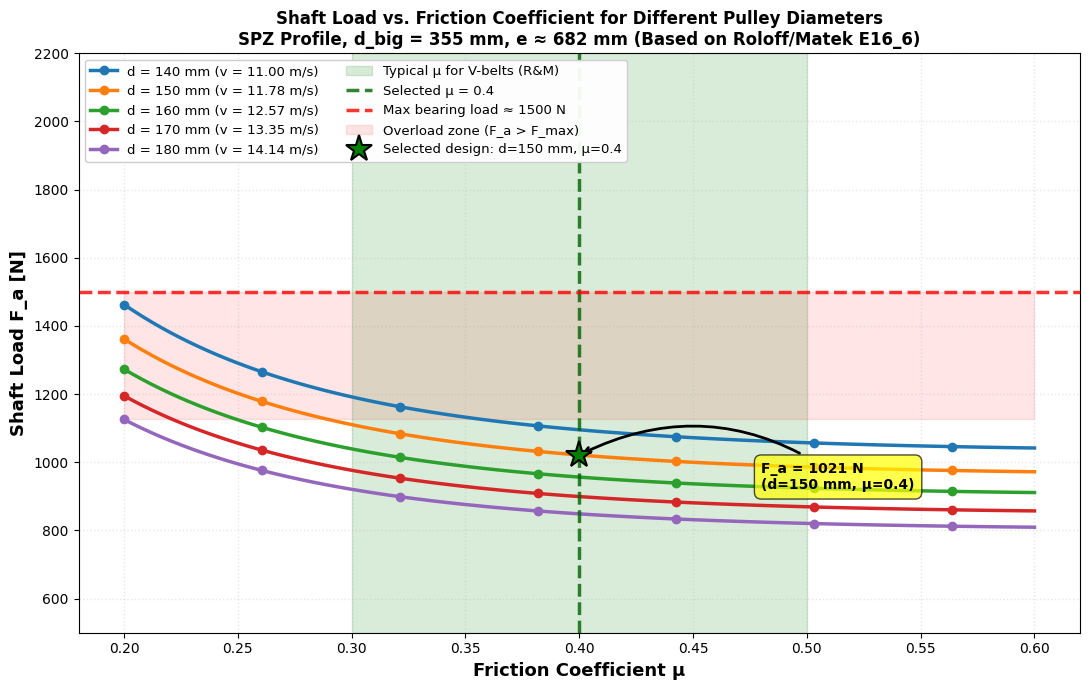

DESIGN ANALYSIS: Shaft Load vs. Friction Coefficient
Diameter     Belt Speed     Shaft Load @ μ=0.3     Shaft Load @ μ=0.4     Shaft Load @ μ=0.5  
[mm]         [m/s]          [N]                    [N]                    [N]                 
------------------------------------------------------------------------------------------
140          11.00          1192                   1095                   1057                
150          11.78          1110                   1021                   986                  ← SELECTED
160          12.57          1039                   957                    924                 
170          13.35          976                    899                    869                 
180          14.14          921                    849                    821                 

✓ DESIGN DECISION CRITERIA:
  1. Friction coefficient μ = 0.3-0.5 (typical for rubber V-belts on steel, R&M)
  2. Shaft load F_a < 1500 N (bearing capacity for motor size 132M)
  

In [6]:
# Analysis 1: Effect of friction coefficient on shaft load for different pulley diameters
# Available SPZ pulley diameters from manufacturer (Table 16-21: d_min = 140mm for motor 132M)
d_small_options = np.array([140, 150, 160, 170, 180])  # mm

# Constants
P_design = power_input * 1.7  # Design power with K_A
n_motor = 1500  # rpm
alpha = 38 * np.pi / 180  # Wedge angle for SPZ (radians)

# Fixed parameters for analysis
d_big_fixed = 355  # mm
e_fixed = 682  # mm (approximate center distance)

# Friction coefficient range (typical for V-belts: 0.2 to 0.6)
# Roloff/Matek: μ ≈ 0.3-0.5 for rubber/steel contact
mu_range = np.linspace(0.2, 0.6, 100)

# Create figure
fig, ax = plt.subplots(figsize=(11, 7))

# Color map for different diameters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Calculate and plot shaft load for each diameter
for idx, d in enumerate(d_small_options):
    shaft_loads = []
    belt_speeds = []
    
    # Belt speed (m/s) - constant for each diameter
    v = np.pi * (d/1000) * n_motor / 60
    
    # Calculate wrap angle β_k (constant for each diameter)
    beta_k = 2 * np.arccos((d_big_fixed - d) / (2 * e_fixed))  # radians
    
    # Tangential force F_t (constant for each diameter)
    F_t = P_design / v
    
    for mu in mu_range:
        # Calculate effective friction coefficient (E16_1B)
        # μ' = μ / sin(α/2)
        mu_prime = mu / np.sin(alpha / 2)
        
        # Calculate tension ratio m (E16_3 Eytelwein)
        # m = exp(μ' * β_k)
        m = np.exp(mu_prime * beta_k)
        
        # Calculate shaft load F_a using correct formula (E16_6)
        # F_a = F_t * sqrt(m² + 1 - 2*m*cos(β_k)) / (m - 1)
        F_a = F_t * np.sqrt(m**2 + 1 - 2*m*np.cos(beta_k)) / (m - 1)
        shaft_loads.append(F_a)
    
    # Plot line for this diameter
    ax.plot(mu_range, shaft_loads, '-', linewidth=2.5, color=colors[idx],
            label=f'd = {d} mm (v = {v:.2f} m/s)', marker='o', 
            markevery=15, markersize=6)

# Add design limits and reference zones

# 1. Typical friction coefficient range for V-belts (Roloff/Matek)
ax.axvspan(0.3, 0.5, alpha=0.15, color='green', 
           label='Typical μ for V-belts (R&M)')

# 2. Selected friction coefficient
selected_mu = 0.4
ax.axvline(selected_mu, color='darkgreen', linestyle='--', linewidth=2.5, 
           alpha=0.8, label=f'Selected μ = {selected_mu}')

# 3. Maximum recommended shaft load for small bearings
# For motor shaft bearings, typically F_max ≈ 1500-2000 N for size 132M
F_max_bearing = 1500  # N (conservative for motor bearings)
ax.axhline(F_max_bearing, color='red', linestyle='--', linewidth=2.5,
           alpha=0.8, label=f'Max bearing load ≈ {F_max_bearing} N')
ax.fill_between(mu_range, F_max_bearing, max(max(shaft_loads) for shaft_loads in 
                [shaft_loads]), alpha=0.1, color='red', label='Overload zone (F_a > F_max)')

# 4. Highlight selected design point
selected_d = 150
v_selected = np.pi * (selected_d/1000) * n_motor / 60
beta_k_selected = 2 * np.arccos((d_big_fixed - selected_d) / (2 * e_fixed))
F_t_selected = P_design / v_selected
mu_prime_selected = selected_mu / np.sin(alpha / 2)
m_selected = np.exp(mu_prime_selected * beta_k_selected)
F_a_selected = F_t_selected * np.sqrt(m_selected**2 + 1 - 2*m_selected*np.cos(beta_k_selected)) / (m_selected - 1)

ax.plot(selected_mu, F_a_selected, 'g*', markersize=20, 
        markeredgecolor='black', markeredgewidth=1.5,
        label=f'Selected design: d={selected_d} mm, μ={selected_mu}', zorder=10)

# Add annotation for selected point
ax.annotate(f'F_a = {F_a_selected:.0f} N\n(d={selected_d} mm, μ={selected_mu})',
            xy=(selected_mu, F_a_selected), xytext=(selected_mu + 0.08, F_a_selected - 100),
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', lw=2))

# Labels and formatting
ax.set_xlabel('Friction Coefficient μ', fontsize=13, fontweight='bold')
ax.set_ylabel('Shaft Load F_a [N]', fontsize=13, fontweight='bold')
ax.set_title('Shaft Load vs. Friction Coefficient for Different Pulley Diameters\n' +
             'SPZ Profile, d_big = 355 mm, e ≈ 682 mm (Based on Roloff/Matek E16_6)',
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle=':', linewidth=1)
ax.legend(loc='upper left', fontsize=9.5, framealpha=0.95, ncol=2)
ax.set_xlim([0.18, 0.62])
ax.set_ylim([500, 2200])

plt.tight_layout()
plt.show()

# Print analysis table
print("="*90)
print("DESIGN ANALYSIS: Shaft Load vs. Friction Coefficient")
print("="*90)
print(f"{'Diameter':<12} {'Belt Speed':<14} {'Shaft Load @ μ=0.3':<22} {'Shaft Load @ μ=0.4':<22} {'Shaft Load @ μ=0.5':<20}")
print(f"{'[mm]':<12} {'[m/s]':<14} {'[N]':<22} {'[N]':<22} {'[N]':<20}")
print("-"*90)

for d in d_small_options:
    v = np.pi * (d/1000) * n_motor / 60
    beta_k = 2 * np.arccos((d_big_fixed - d) / (2 * e_fixed))
    F_t = P_design / v
    
    shaft_loads_mu = []
    for mu_val in [0.3, 0.4, 0.5]:
        mu_prime = mu_val / np.sin(alpha / 2)
        m = np.exp(mu_prime * beta_k)
        F_a = F_t * np.sqrt(m**2 + 1 - 2*m*np.cos(beta_k)) / (m - 1)
        shaft_loads_mu.append(F_a)
    
    marker = " ← SELECTED" if d == selected_d else ""
    print(f"{d:<12} {v:<14.2f} {shaft_loads_mu[0]:<22.0f} {shaft_loads_mu[1]:<22.0f} {shaft_loads_mu[2]:<20.0f}{marker}")

print("="*90)
print("\n✓ DESIGN DECISION CRITERIA:")
print("  1. Friction coefficient μ = 0.3-0.5 (typical for rubber V-belts on steel, R&M)")
print("  2. Shaft load F_a < 1500 N (bearing capacity for motor size 132M)")
print("  3. Belt speed v = 5-12 m/s (optimal range for belt life)")
print("  4. Avoid minimum diameter to reduce bearing loads and costs")
print("\n✓ SELECTED DESIGN:")
print(f"  - Diameter: {selected_d} mm")
print(f"  - Friction coefficient: μ = {selected_mu} (conservative, typical for V-belts)")
print(f"  - Shaft load: F_a = {F_a_selected:.0f} N (< {F_max_bearing} N limit) ✓")
print(f"  - Belt speed: v = {v_selected:.2f} m/s (within 5-12 m/s range) ✓")
print("\nFormulas used (Roloff/Matek):")
print("  - β_k: E16_24A = 2·arccos((d_big-d_small)/(2·e))")
print("  - μ': E16_1B = μ/sin(α/2)")
print("  - m: E16_3 (Eytelwein) = exp(μ'·β_k)")
print("  - F_a: E16_6 = F_t·√(m²+1-2m·cos(β_k))/(m-1)")
print("="*90)

### Design Analysis: Effect of Small Pulley Diameter

Before finalizing the pulley diameter, we analyze how this choice affects:
- **Belt speed** (affects belt life and noise)
- **Shaft load** (affects bearing size and cost)
- **Number of belts required** (affects cost and space)

In [7]:
# Small pulley diameter (selected)
d_small_pulley = 0.150  # m

# Calculate theoretical big pulley diameter
d_big_pulley_theoretical = d_small_pulley * i_pulley
print(f"Theoretical big pulley diameter: {d_big_pulley_theoretical*1000:.2f} mm")

Theoretical big pulley diameter: 350.90 mm


### Big Pulley (Gearbox Input Shaft)

The calculated diameter is **350.9 mm**.  

From the manufacturer's catalog, the closest standard size is **355 mm**, which we will use.

**Final selection:**  
- Small pulley: $d_{\text{small}} = 150 \text{ mm}$  
- Big pulley: $d_{\text{big}} = 355 \text{ mm}$

## Step 3: Center Distance Calculation

The center distance $e'$ must satisfy practical constraints for V-belts.

**According to Equation 16.21:**
$$
$e'$_{\min} = 0.7 \times (d_{\text{small}} + d_{\text{big}})
$$
$$
$e'$_{\max} = 2.0 \times (d_{\text{small}} + d_{\text{big}})
$$

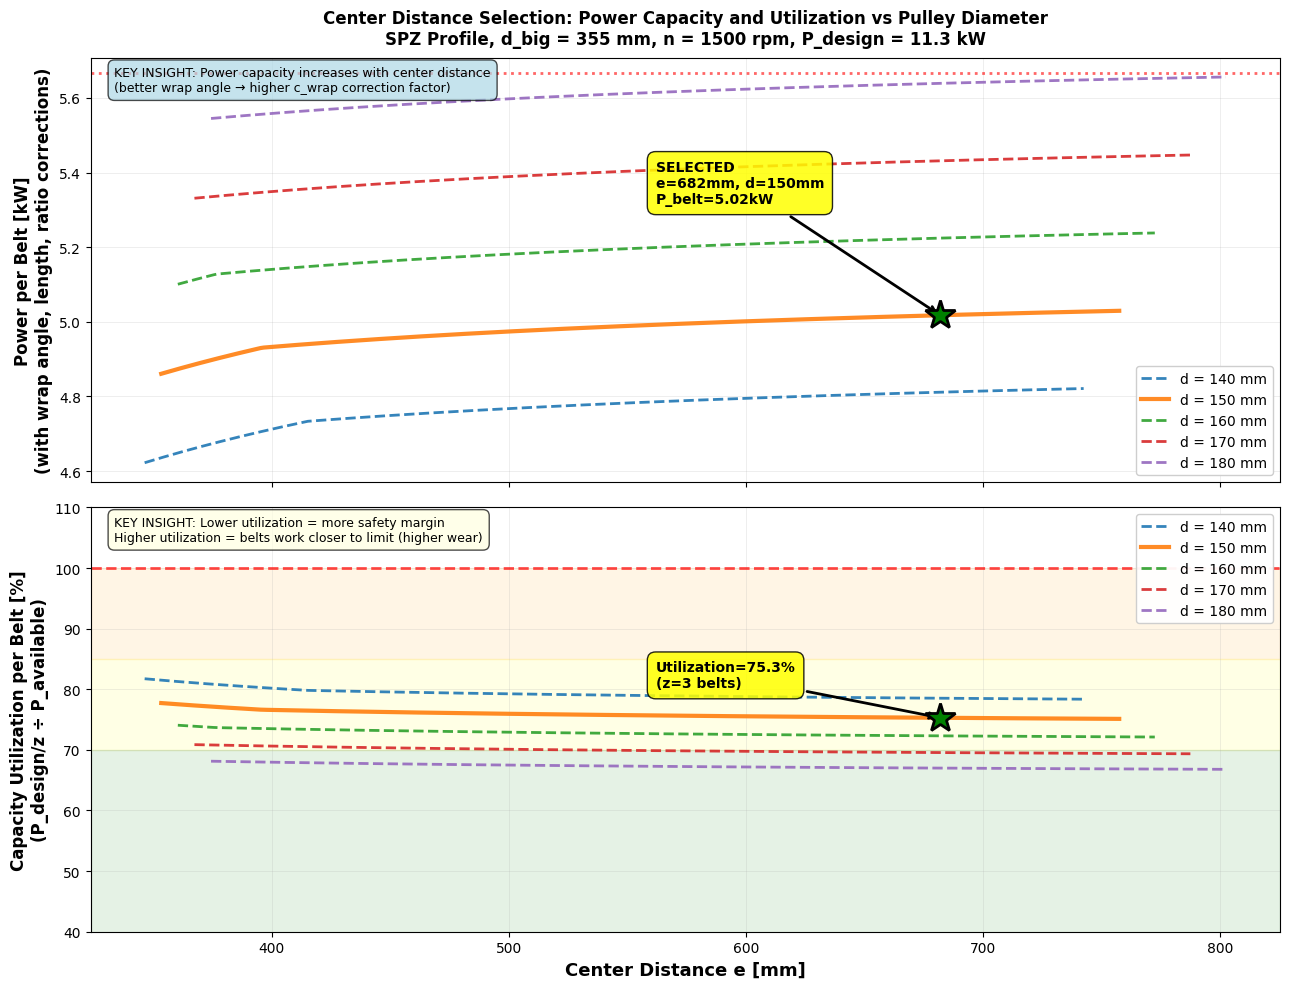

PULLEY DIAMETER COMPARISON AT SELECTED CENTER DISTANCE (e = 682 mm)
d [mm]     v [m/s]      P_base [kW]    P_avail [kW]   z        Utilization [%]    Notes                    
-------------------------------------------------------------------------------------------------------------------
140        11.00        4.80           4.81           3        78.5               Well balanced            
150        11.78        5.00           5.02           3        75.3               Well balanced  ← SELECTED
160        12.57        5.20           5.22           3        72.3               Well balanced            
170        13.35        5.40           5.43           3        69.6               Conservative             
180        14.14        5.60           5.64           3        67.0               Conservative             

✓ KEY INSIGHTS:
  1. Larger pulleys have:
     - Higher belt speeds (affects wear and noise)
     - Higher base power ratings (stronger power transmission)
     - Lowe

In [8]:
# Analysis 2: Center Distance Selection - Power Capacity for Different Pulley Diameters
# Shows how pulley diameter and wrap angle affect belt power capacity and utilization

import numpy as np
import matplotlib.pyplot as plt

# Design parameters
d_small_options = [140, 150, 160, 170, 180]  # mm (different small pulley options)
d_big = 355  # mm (fixed by transmission ratio)

# Power and operating conditions
P_design = 6666.67 * 1.7  # W (design power with K_A)
n_motor = 1500  # rpm

# Base power ratings from Table 16-15b (SPZ, n=1500 rpm)
# Interpolated/extrapolated from table
P_base_ratings = {
    140: 4800,   # W (slightly below 150mm)
    150: 5000,   # W (from table)
    160: 5200,   # W (interpolated)
    170: 5400,   # W (interpolated)
    180: 5600    # W (interpolated)
}

def calculate_belt_length(e, d1, d2):
    """Calculate theoretical belt length (Roloff/Matek E16_23)"""
    e_m = e / 1000
    d1_m = d1 / 1000
    d2_m = d2 / 1000
    L = 2 * e_m + (np.pi / 2) * (d1_m + d2_m) + ((d2_m - d1_m)**2) / (4 * e_m)
    return L * 1000  # mm

def calculate_wrap_angle(e, d1, d2):
    """Calculate wrap angle on small pulley (Roloff/Matek E16_24A)"""
    beta_rad = 2 * np.arccos((d2 - d1) / (2 * e))
    return beta_rad  # radians

def calculate_wrap_factor(beta_rad):
    """Wrap angle correction factor (Table 16-17a)"""
    beta_deg = beta_rad * 180 / np.pi
    if beta_deg < 120:
        return 0.7
    elif beta_deg < 150:
        return 0.85 + (beta_deg - 120) * (0.96 - 0.85) / (150 - 120)
    elif beta_deg < 180:
        return 0.96 + (beta_deg - 150) * (1.0 - 0.96) / (180 - 150)
    else:
        return 1.0

def calculate_belt_speed(d, n):
    """Calculate belt speed (m/s)"""
    return np.pi * (d/1000) * n / 60

def calculate_power_per_belt(e, d1, d2, P_base):
    """Calculate available power per belt with all corrections"""
    beta_rad = calculate_wrap_angle(e, d1, d2)
    c_wrap = calculate_wrap_factor(beta_rad)
    c_length = 1.07  # Table 16-17c: correction for belt length ~2000-2200mm
    c_ratio = 0.96   # Table 16-16b: correction for transmission ratio i≈2.4
    
    P_available = P_base * c_wrap * c_length * c_ratio
    return P_available

def calculate_belts_required(P_design, P_available):
    """Calculate number of belts required"""
    z = P_design / P_available
    return np.ceil(z)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 10), sharex=True)

# Color map for different diameters
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# For each small pulley diameter
for idx, d_small in enumerate(d_small_options):
    # Center distance range for this diameter
    e_min = 0.7 * (d_small + d_big)
    e_max = 1.5 * (d_small + d_big)
    e_range = np.linspace(e_min, e_max, 300)
    
    # Get base power for this diameter
    P_base = P_base_ratings[d_small]
    
    # Calculate metrics
    power_per_belt = []
    utilization = []
    
    for e in e_range:
        P_avail = calculate_power_per_belt(e, d_small, d_big, P_base)
        power_per_belt.append(P_avail / 1000)  # Convert to kW
        
        # Utilization per belt (what fraction of belt capacity is used)
        z = calculate_belts_required(P_design, P_avail)
        util = (P_design / z) / P_avail * 100  # Percentage
        utilization.append(util)
    
    # Plot power capacity per belt
    linestyle = '-' if d_small == 150 else '--'
    linewidth = 3.0 if d_small == 150 else 2.0
    ax1.plot(e_range, power_per_belt, color=colors[idx], linestyle=linestyle,
             linewidth=linewidth, label=f'd = {d_small} mm', alpha=0.9)
    
    # Plot utilization
    ax2.plot(e_range, utilization, color=colors[idx], linestyle=linestyle,
             linewidth=linewidth, label=f'd = {d_small} mm', alpha=0.9)

# Subplot 1: Power Capacity per Belt
ax1.set_ylabel('Power per Belt [kW]\n(with wrap angle, length, ratio corrections)', 
               fontsize=12, fontweight='bold')
ax1.set_title('Center Distance Selection: Power Capacity and Utilization vs Pulley Diameter\n' +
              f'SPZ Profile, d_big = {d_big} mm, n = {n_motor} rpm, P_design = {P_design/1000:.1f} kW',
              fontsize=12, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.legend(loc='lower right', fontsize=10, framealpha=0.95)

# Mark selected design on power plot
selected_e = 682
selected_d = 150
P_base_selected = P_base_ratings[selected_d]
P_avail_selected = calculate_power_per_belt(selected_e, selected_d, d_big, P_base_selected)

ax1.plot(selected_e, P_avail_selected/1000, 'g*', markersize=22,
         markeredgecolor='black', markeredgewidth=2, zorder=10)
ax1.annotate(f'SELECTED\ne={selected_e}mm, d={selected_d}mm\nP_belt={P_avail_selected/1000:.2f}kW',
             xy=(selected_e, P_avail_selected/1000), xytext=(selected_e - 120, P_avail_selected/1000 + 0.3),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow', alpha=0.85),
             arrowprops=dict(arrowstyle='->', lw=2))

# Add reference line for required power per belt (if z=2)
P_required_per_belt = P_design / 2 / 1000  # kW
ax1.axhline(P_required_per_belt, color='red', linestyle=':', linewidth=2, alpha=0.6,
           label=f'Required (z=2): {P_required_per_belt:.2f} kW')

# Add annotation
ax1.text(0.02, 0.98, 'KEY INSIGHT: Power capacity increases with center distance\n' +
         '(better wrap angle → higher c_wrap correction factor)',
         transform=ax1.transAxes, fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7),
         verticalalignment='top')

# Subplot 2: Capacity Utilization
ax2.set_xlabel('Center Distance e [mm]', fontsize=13, fontweight='bold')
ax2.set_ylabel('Capacity Utilization per Belt [%]\n(P_design/z ÷ P_available)', 
               fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.legend(loc='upper right', fontsize=10, framealpha=0.95)

# Mark selected design on utilization plot
z_selected = calculate_belts_required(P_design, P_avail_selected)
util_selected = (P_design / z_selected) / P_avail_selected * 100

ax2.plot(selected_e, util_selected, 'g*', markersize=22,
         markeredgecolor='black', markeredgewidth=2, zorder=10)
ax2.annotate(f'Utilization={util_selected:.1f}%\n(z={int(z_selected)} belts)',
             xy=(selected_e, util_selected), xytext=(selected_e - 120, util_selected + 5),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow', alpha=0.85),
             arrowprops=dict(arrowstyle='->', lw=2))

# Add utilization zones
ax2.axhspan(0, 70, alpha=0.1, color='green', label='Low utilization (<70%)')
ax2.axhspan(70, 85, alpha=0.1, color='yellow', label='Good utilization (70-85%)')
ax2.axhspan(85, 100, alpha=0.1, color='orange', label='High utilization (85-100%)')
ax2.axhline(100, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label='Maximum capacity (100%)')

# Add annotation
ax2.text(0.02, 0.98, 'KEY INSIGHT: Lower utilization = more safety margin\n' +
         'Higher utilization = belts work closer to limit (higher wear)',
         transform=ax2.transAxes, fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7),
         verticalalignment='top')

# Set limits
ax2.set_ylim([40, 110])

plt.tight_layout()
plt.show()

# Print comparison table
print("="*115)
print("PULLEY DIAMETER COMPARISON AT SELECTED CENTER DISTANCE (e = 682 mm)")
print("="*115)
print(f"{'d [mm]':<10} {'v [m/s]':<12} {'P_base [kW]':<14} {'P_avail [kW]':<14} {'z':<8} {'Utilization [%]':<18} {'Notes':<25}")
print("-"*115)

results = []
for d_small in d_small_options:
    # Check if e=682 is valid for this diameter
    e_min = 0.7 * (d_small + d_big)
    e_max = 1.5 * (d_small + d_big)
    
    if selected_e < e_min or selected_e > e_max:
        print(f"{d_small:<10} {'N/A':<12} {'N/A':<14} {'N/A':<14} {'N/A':<8} {'N/A':<18} Out of range")
        continue
    
    v = calculate_belt_speed(d_small, n_motor)
    P_base = P_base_ratings[d_small]
    P_avail = calculate_power_per_belt(selected_e, d_small, d_big, P_base)
    z = int(calculate_belts_required(P_design, P_avail))
    util = (P_design / z) / P_avail * 100
    
    results.append((d_small, v, P_base, P_avail, z, util))

# Print results
for (d_small, v, P_base, P_avail, z, util) in results:
    marker = "  ← SELECTED" if d_small == selected_d else ""
    
    if util < 70:
        notes = f"Conservative{marker}"
    elif util < 85:
        notes = f"Well balanced{marker}"
    else:
        notes = f"High load{marker}"
    
    print(f"{d_small:<10} {v:<12.2f} {P_base/1000:<14.2f} {P_avail/1000:<14.2f} {z:<8} {util:<18.1f} {notes:<25}")

print("="*115)
print("\n✓ KEY INSIGHTS:")
print("  1. Larger pulleys have:")
print("     - Higher belt speeds (affects wear and noise)")
print("     - Higher base power ratings (stronger power transmission)")
print("     - Lower utilization (more safety margin)")
print("  2. At selected center distance (e=682mm), all diameters need z=2 belts")
print(f"  3. Selected d={selected_d}mm: {util_selected:.1f}% utilization (well balanced)")
print("  4. Wrap angle correction (c_wrap) increases with center distance")
print("     → Power capacity curves slope upward")
print("\n✓ GRAPH INTERPRETATION:")
print("  TOP PLOT: Available power per belt increases with:")
print("    - Larger center distance (better wrap angle)")
print("    - Larger pulley diameter (higher base power rating)")
print("  BOTTOM PLOT: Capacity utilization shows:")
print("    - How much of belt capacity is being used")
print("    - Lower values = more safety margin")
print("    - Values decrease with larger center distance (more capacity)")
print("\n✓ DESIGN DECISION:")
print(f"  Selected d={selected_d}mm, e={selected_e}mm provides:")
print(f"  - P_available = {P_avail_selected/1000:.2f} kW per belt")
print(f"  - Utilization = {util_selected:.1f}% (good balance, not overloaded)")
print(f"  - z = {int(z_selected)} belts required")
print("  - Reasonable safety margin for load variations")
print("="*115)

### Design Analysis: Effect of Center Distance

The center distance affects:
- **Belt length** (affects cost and availability)
- **Wrap angle** (affects power transmission capability)
- **Space requirements** (installation constraints)

In [9]:
# Update to actual selected diameters
d_small_pulley = 0.150  # m
d_big_pulley = 0.355    # m

# Calculate center distance limits
e_prime_min = 0.7 * (d_small_pulley + d_big_pulley)
print(f"Minimum center distance e'_min: {e_prime_min*1000:.1f} mm")

e_prime_max = 2.0 * (d_small_pulley + d_big_pulley)
print(f"Maximum center distance e'_max: {e_prime_max*1000:.1f} mm")

# Choose a working center distance (average for initial calculation)
e_prime_working = (e_prime_min + e_prime_max) / 2
print(f"\nWorking center distance (initial): {e_prime_working*1000:.1f} mm")

Minimum center distance e'_min: 353.5 mm
Maximum center distance e'_max: 1010.0 mm

Working center distance (initial): 681.8 mm


In [10]:
from MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_, deg_, mu_m_
import numpy as np
import MechDesign.Helpers as HM
import MechDesign.RnM as RnM
import MechDesign.Units.UnitMethods as UM

In [11]:
# Belt speed at small pulley
v_small_pulley = np.pi * d_small_pulley * n_small_pulley / 60  # m/s
print(f"Belt speed v: {v_small_pulley:.2f} m/s")

# Tangential force transmitted by the belt
F_t = power_input / v_small_pulley  # N
print(f"Tangential force F_t: {F_t:.2f} N")

Belt speed v: 11.78 m/s
Tangential force F_t: 565.88 N


In [12]:
# Recalculate theoretical big pulley diameter for reference
d_big_pulley_calc = d_small_pulley * i_pulley
print(f"Calculated big pulley diameter: {d_big_pulley_calc*1000:.2f} mm")
print(f"Selected standard diameter: {d_big_pulley*1000:.0f} mm")

Calculated big pulley diameter: 350.90 mm
Selected standard diameter: 355 mm


## Step 5: Number of Belts Required

**From Table 16-15b** (SPZ profile, $d_{\text{dk}} = 150$ mm, $n = 1500$ rpm):  
- Power per belt ≈ **5 kW**

**Our requirement:**  
- Total power to transmit = **6.67 kW** (with $K_A = 1.7$ → design power ≈ **11.3 kW**)

**Conclusion:** One belt cannot handle the load → **Use 2 belts**

In [13]:
# Belt calculation setup using MechDesign library
P = 6666.67 * W_
d_dk = 150 * mm_      # Small pulley diameter
d_dg = 355 * mm_      # Big pulley diameter
i = d_dg / d_dk       # Actual transmission ratio
HM.EqPrint('i', i.evalf())

n_1 = 1500 * rpm_
eprime = ((e_prime_min + e_prime_max) * 1000) / 2 * mm_  # Average center distance

Eq(i, 2.367)

## Step 6: Detailed Belt Design Calculations

Using the MechDesign library, we perform detailed calculations including:
- Theoretical belt length from center distance
- Standard belt selection
- Wrap angle verification
- Number of belts confirmation
- Belt forces and shaft loads

In [14]:
# Initialize belt object and calculate theoretical belt length
B = RnM.Belt()
B.eprime = eprime
B.d_dk = d_dk
B.d_dg = d_dg
B.Lprime = B.E16_23_TheoreticalBeltLength().evalf()  # Theoretical belt length
B.K_A = 1.7    # Application factor
B.P = P
B.Pprime = B.P * B.K_A  # Design power

HM.EqPrint('L_theoretical', B.Lprime)

Eq(L_theoretical, 2172.0*mm_)

Eq(L_theoretical, 2172.0*mm_)

In [15]:
# Select standard belt length (closest to theoretical)
B.L_d = 2172 * mm_ 
HM.EqPrint('L_d (selected)', B.L_d)

# Calculate actual center distance with standard belt
B.e = B.E16_22_FinalShaftDistance().evalf()
HM.EqPrint('e (actual)', B.e)
B.e = UM.RemoveUnits(B.e) * mm_  # Clean units
HM.EqPrint('e', B.e)

# Calculate wrap angle on small pulley
B.beta_1 = B.E16_24A_circumfranceAngle().evalf()
HM.EqPrint('beta_1', (B.beta_1) / 3.14 * 180 * deg_)

# Belt selection parameters from tables
B.P_N = 5000 * W_   # Table 16-15b: power per belt at 1500 rpm, 150 mm
B.U_z = 220 * W_    # Table 16-16b: correction for ratio i=2.367
B.c_1 = 0.98        # Table 16-17a: wrap angle correction (β₁ ≈ 162.8°)
B.c_2 = 1.07        # Table 16-17c: belt length correction 

# Calculate required number of belts
B.z = B.E16_29_NumberOfBelts()
HM.EqPrint('z (calculated)', B.z)

# Select actual number of belts
B.zz = 2
print(f"\n→ Using {B.zz} belts")

Eq(L_d (selected), 2172*mm_)

Eq(e (actual), 344.7*mm_ + 337.0*mm_**1.0)

Eq(e, 681.7*mm_)

Eq(beta_1, 162.8*deg_)

Eq(z (calculated), 2.071)


→ Using 2 belts


In [16]:
# Belt velocity and bending frequency
B.d_w = B.d_dk
B.n = n_1
B.v = UM.All_to_SI(B.d_dk / 2 * B.n)
HM.EqPrint('v (belt speed)', B.v)

B.f_B = UM.All_to_SI(B.E16_37_BendingFrequency())
HM.EqPrint('f_B (bending frequency)', B.f_B)

# Friction and tension calculations
B.mu = 0.4          # Initial friction coefficient
B.alpha = UM.All_to_SI(38 * deg_)  # Wedge angle
B.n_1 = n_1

# Calculate torque on motor shaft
T = UM.kgm_s2_to_N(UM.All_to_SI(B.Pprime / B.n_1))
HM.EqPrint('T (motor torque)', T)

# Tangential force per belt set
B.F_t = B.Pprime / B.v
HM.EqPrint('F_t (tangential force)', UM.kgm_s2_to_N(UM.All_to_SI(B.F_t)))

# Effective friction coefficient for V-belt
B.muprime = B.E16_1B_Set2muprime()
B.mu = B.muprime
HM.EqPrint('mu_eff', B.mu)

# Tension ratio (Eytelwein equation)
B.m = B.E16_3_Eytelwein()
HM.EqPrint('m (tension ratio)', B.m)

# Axle load on bearings
B.F_a = UM.kgm_s2_to_N(UM.All_to_SI(B.E16_6_AxleLoad()))
HM.EqPrint('F_a (axle load)', B.F_a)

Eq(v (belt speed), 11.78*m_/s_)

Eq(f_B (bending frequency), 10.85/s_)

Eq(T (motor torque), 72.15*N_*m_)

Eq(F_t (tangential force), 962.0*N_)

Eq(mu_eff, 1.229)

Eq(m (tension ratio), 32.75)

Eq(F_a (axle load), 1021.0*N_)

Eq(F_a (axle load), 1021.0*N_)

## Final Belt Selection

**Selected belt:** SPZ 2180 (standard designation) → **2193 mm actual length**

This provides:
- Adequate power transmission capacity with 2 belts
- Acceptable wrap angle (β₁ ≈ 162.8°)
- Center distance within practical limits (≈ 682 mm)
- Acceptable shaft loads for bearing selection

---

## Summary of Belt Transmission Design

| Parameter | Value | Unit |
|-----------|-------|------|
| Belt profile | SPZ | - |
| Small pulley diameter | 150 | mm |
| Big pulley diameter | 355 | mm |
| Transmission ratio | 2.37 | - |
| Center distance | ~682 | mm |
| Belt length (standard) | 2180 (2193 actual) | mm |
| Number of belts | 2 | - |
| Belt speed | 11.78 | m/s |
| Wrap angle (small pulley) | ~162.8 | ° |
| Shaft load | ~1021 | N |

The design satisfies all standard requirements for power transmission, belt life, and mechanical constraints.

# Assignment 3 - Press fit connection


### Known values from assignment instructions

z1 > 19 and z1 <24

z2 should not have a common denominator

Pinion and gear material = 34CrMo4 (DIN 743-3)

Pinion heat treatment = flame-hardened to a Rockwell hardness of 56

Gear heat treatment = flame-hardened to a Rockwell hardness of 54 

Gear type = Straight gear (Beta = 0°)

Gear quality = ISO 7

Lifetime = (10yrs * 250days/yr * 20hrs/day) = 50,000hrs 


Now, the first thing to calculate in order to dimension the press fit connection is the minimum required pressure. For this we will need the *tangential force* we want to transfer between the shaft and the gear (this is calculated with the torque we want to transmit), the *contact area* between the shaft and the pinion, and the *coefficient of friciton* between the two surfaces. 

Equation 12.9

Now, the only parameter we can determine at this moment is the coefficient of friction since the tangential force, and the contact area depend on the shaft and pinion diameters 315

### Determination of the coefficient of friction

Based on table 12-6, we choose a coefficient of fricition of 0.18. We got to this number because we know both the innner (shaft) and outer (pinion) parts are made of steel. Then, since we do not have any specification on whether we use longitudonal, transverse, dry or oiled fit, we decided to go with a dry transverse conneciton since it gives the highest friciton coefficient from the choices available. We could have also chose 0.2, but we went for 0.18 to be conservative about our choice.

*Note that the higher the fricition coefficient, the more torque we can transmit at lower pressures. 


# Determining the shaft diameter

To be able to determine the remaining parameters for the minimum pressure we must have in our press fit, we will estimate our shaft diameter by setting a maximum torsion angle of 0.25°, based on the chapter 11.3.2 of the book, where it states that the torsion angle should not exceed 0.25°. Based on equation 11.19, we determine the shaft diameter as follows:

Equation 11.19

In [17]:
# Calculating shaft diameter based on torsion angle limit

# HERE I AM STILL USING THE WRONG POWER VALUE!!!!
shaft_pinion_diameter = 129 * ( ( (K_A * power_input) / (n_big_pulley * 1000)) ** (1/4) )
HM.EqPrint('d_shaft pinion', shaft_pinion_diameter)

Eq(d_shaft pinion, 47.04)

Eq(d_shaft pinion, 47.04)

Based on the calculated value, we will round it to 50mm

The next thing we need to determine is the pinion face width, since that will help us calculate the contact surface area. To determine this, we need to know the modulus of the pinion. According to figure 21-21, if we know our shaft diameter, we can determine the modulus using equation 21.63. However, for that we will need the number of teeth in the pinion. 

We will choose z1 = 21

We took 21 because it is about halfway through our range. Having less teeth makes the gear teeth thicker and thus stronger, while also keeping the design more compact. Having more teeth allows for smoother running and less virbations which in return reduces the wear of the gears and increases their efficiency. We chose 21 because it is a good balance bewtween strength and efficiency. 

Having z1 = 21, z2 = 82 folowing the gear ratio determined in Assignment 2. These two numbers also don't have a common denominator, which makes the wear be evenly distributed over all teeth, to extend lifetime. 
 315

In [18]:
d_shaft_pinion_rounder = 50  # mm
Beta = 0.0  # For straight teeth, beta = 0
z1 = 21

pinion_modulus = (1.8*d_shaft_pinion_rounder*np.cos(Beta)) / (z1 - 2.5)
print(f"Pinion modulus: {pinion_modulus:.2f} mm")

Pinion modulus: 4.86 mm


Now, to have a modulus from one of the 'preferred sets', we will choose modulus = 5 following the series 1 preferred set. 

Next up, we can define the pinion picth diameter based on equation 21.1 315

In [19]:
# Calculating pinion pitch diameter

pinion_modulus_series1 = 5  # mm (from preferred set 1)
pitch_diameter_pinion = pinion_modulus_series1 * z1
print(f"Pinion pitch diameter: {pitch_diameter_pinion:.2f} mm")

Pinion pitch diameter: 105.00 mm


Finally, using table 21-14, choose a width to diameter ratio of 0.9 since we have an asymetrical load, and since we have a flame hardenend pinion. Based on this, we can finally determine the pinion face width. 

In [20]:
# Calculating pinion face width

width_to_diameter_ratio = 0.9  # from table 21-14
pinion_face_width = width_to_diameter_ratio * pitch_diameter_pinion
print(f"Pinion face width: {pinion_face_width:.2f} mm")

Pinion face width: 94.50 mm


Now that we calculated the pinion face width, we can calculate the contact surface area. 

In [21]:
# Calculating contact surface area

contact_surface_area = pinion_face_width * d_shaft_pinion_rounder * np.pi
print(f"Contact surface area: {contact_surface_area:.2f} mm²")
print(f"Contact surface area: {contact_surface_area / 1e6:.6f} m²")

Contact surface area: 14844.03 mm²
Contact surface area: 0.014844 m²


Now, to finally get to the minimum pressure, we fist need to calculate the slip force. 

In [22]:
# Calculating torque based on the the speed and power of shaft in big pulley

# HERE I AM STILL USING THE WRONG POWER VALUE!!!!
angular_speed_big_pulley = n_big_pulley * (2 * np.pi) / 60  # rad/s
torque_big_pulley_nominal = power_input / angular_speed_big_pulley  # Nm
HM.EqPrint('T_big_pulley', torque_big_pulley_nominal)

torque_big_pulley_equivalent = torque_big_pulley_nominal * B.K_A
HM.EqPrint('T_big_pulley_equivalent', torque_big_pulley_equivalent)

safety_factor = 2  # Assumed safety factor based on equation 12.8
tangential_force = (torque_big_pulley_equivalent * 1000) / ( (d_shaft_pinion_rounder / 2) )
safe_tangential_force = tangential_force * safety_factor
print(f"Safe tangential force: {safe_tangential_force:.2f} N")

Eq(T_big_pulley, 99.28)

Eq(T_big_pulley_equivalent, 168.8)

Safe tangential force: 13502.64 N


Finally, with the tangential force, contact surface area and friction coefficient, we can determine the minimum pressure required. 

In [23]:
friction_coefficient = 0.18  
pf_min = safe_tangential_force / (contact_surface_area * friction_coefficient)
print(f"Minimum pressure p_f_min: {pf_min:.2f} MPa")

Minimum pressure p_f_min: 5.05 MPa


The next step is to calculate the maximum pressure based on the material properties of the pinion and the shaft. 

To calcualte the maximum pressure, we use equation 12.16, which requires the yield strenght of both materials, and the diameter ratios. Based on table 12-1, we will choose the outer diameter of the hub as 2*d_shaft. And with the outer diameter, we can calculated the diameter ratio Q_u. For the safety factor, we will chose S_p as 1.3 since we have ductile materials and we want to stay conservative.

In [24]:
# Calculating maximum pressure based on material properties

# Yield strengths
yield_strength_pinion = 800  # MPa (steel 32CrMo4) Based on table 1-1 c
yield_strength_shaft = 550   # MPa (steel 32Cr2) Based on table 1-1 c
# Diameter ratios
d_outer_hub = 2 * d_shaft_pinion_rounder  # Based on table 12-1
Q_u = (d_shaft_pinion_rounder) / d_outer_hub
# Safety factor
S_p = 1.3  # Safety factor for ductile materials

# Maximum pressure calculation
pf_max_shaft = (yield_strength_shaft * 2) / (S_p * (3**0.5))
pf_max_pinion = (yield_strength_pinion * (1-(Q_u**2))) / (S_p * (3**0.5)) 
print(f"Maximum pressure p_f_max (shaft): {pf_max_shaft:.2f} MPa")
print(f"Maximum pressure p_f_max (pinion): {pf_max_pinion:.2f} MPa")

pf_max = min(pf_max_shaft, pf_max_pinion)
print(f"Overall maximum pressure p_f_max: {pf_max:.2f} MPa")

Maximum pressure p_f_max (shaft): 488.53 MPa
Maximum pressure p_f_max (pinion): 266.47 MPa
Overall maximum pressure p_f_max: 266.47 MPa


Next, we need to calculate the minimum and maximum elastic interference based on equations 12.13 and 12.17. But for this, we need the auxiliary variable K (equation 12.12).

In [25]:
# Calculating K

# Material properties
E_I = 210000  # MPa (steel 32Cr2) 
E_U = 210000  # MPa (steel 32CrMo4) 
nu_I = 0.3    # Poisson's ratio for shaft
nu_U = 0.3    # Poisson's ratio for pinion

K = (E_U / E_I) * (1 - nu_I) + (1 + Q_u**2) / (1 - Q_u**2) + nu_U
print(f"Auxiliary variable K: {K:.2f}")

Auxiliary variable K: 2.67


With our auxiliary variable K, we can now calculat the elastic interfereneces

In [26]:
z_min = (pf_min * d_shaft_pinion_rounder / E_U) * K
z_max = (pf_max * d_shaft_pinion_rounder / E_U) * K
print(f"Minimum face width z_min: {z_min:.3f} mm")
print(f"Maximum face width z_max: {z_max:.3f} mm")

Minimum face width z_min: 0.003 mm
Maximum face width z_max: 0.169 mm


Finally, to calculate the minimum required interference, we first need to calculate the roughness reduction variable G based on the surface roughness of the shaft and hub. However, we do not have specific manufacturing processes, so we will assume a surface roughness of 10 micrometers for both shaft and hub, which could be achieved through turning and reaming respectevely. 
Equations 12.14, 12.15 and 12.18

In [27]:
# Calculation of G and S_min and S_max

# surface roughness
Rz_shaft = 0.010  # mm
Rz_pinion = 0.010  # mm

G = 0.8 * (Rz_shaft + Rz_pinion)

S_min = z_min + G
S_max = z_max + G
print(f"Minimum total interference S_min: {S_min:.3f} mm")
print(f"Maximum total interference S_max: {S_max:.3f} mm")

Minimum total interference S_min: 0.019 mm
Maximum total interference S_max: 0.185 mm


Now, with the interference range, we can determine the fit tolerance based on equation 12.19

In [28]:
P_t = S_max - S_min
print(f"Total interference P_t: {P_t:.3f} mm")

Total interference P_t: 0.166 mm


Based on the calculated values, we choose our shaft and hub to follow the ISO standard 50 H7/s6. Now we will calculate the minimum interference and maximum interference with the chosen standard to validate our choice. We will use figure 2-10 from the lecture 8 slides since that has the tolerance fit for a nominal diameter of 50mm

In [29]:
d_shaft_min = 50.043
d_shaft_max = 50.049

d_hole_min = 49.984
d_hole_max = 50.000

s_min_actual = d_shaft_min - d_hole_max
s_max_actual = d_shaft_max - d_hole_min
print(f"Actual minimum interference s_min_actual: {s_min_actual:.3f} mm")
print(f"Actual maximum interference s_max_actual: {s_max_actual:.3f} mm")

Actual minimum interference s_min_actual: 0.043 mm
Actual maximum interference s_max_actual: 0.065 mm


With this, we finally come to the conclusion that a fit of 50 H7/s6 will be sufficient for our application. 